# Predicting house prices

Perhaps the most useful feature of statistical models like linear regression is that you can make predictions. That is, you specify values for each of the explanatory variables, feed them to the model, and get a prediction for the corresponding response variable. The code flow is as follows.

```
explanatory_data = pd.DataFrame({"explanatory_var": list_of_values})
predictions = model.predict(explanatory_data)
prediction_data = explanatory_data.assign(response_var=predictions)
```

Here, you'll make predictions for the house prices in the Taiwan real estate dataset.

In [2]:
import pandas as pd
# Import numpy with alias np
import numpy as np

# Create the explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0,11)})

# Print it
print(explanatory_data)

    n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10


In [4]:
taiwan_real_estate = pd.read_csv("dataset/taiwan_real_estate2.csv")

# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate).fit()


# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Print it
print(price_twd_msq)

0      8.224237
1      9.022317
2      9.820397
3     10.618477
4     11.416556
5     12.214636
6     13.012716
7     13.810795
8     14.608875
9     15.406955
10    16.205035
dtype: float64


In [5]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq)

# Print the result
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


In [8]:
prediction_data["Another column"] = price_twd_msq
# Print the result
print(prediction_data)

    n_convenience  price_twd_msq  Another column
0               0       8.224237        8.224237
1               1       9.022317        9.022317
2               2       9.820397        9.820397
3               3      10.618477       10.618477
4               4      11.416556       11.416556
5               5      12.214636       12.214636
6               6      13.012716       13.012716
7               7      13.810795       13.810795
8               8      14.608875       14.608875
9               9      15.406955       15.406955
10             10      16.205035       16.205035


# Visualizing predictions

The prediction DataFrame you created contains a column of explanatory variable values and a column of response variable values. That means you can plot it on the same scatter plot of response versus explanatory data values.

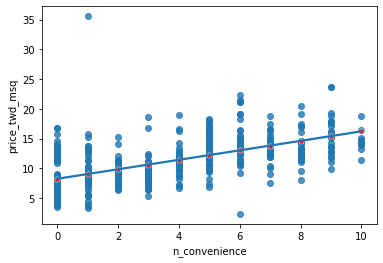

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience",
            y="price_twd_msq",
            data=prediction_data,
            color="red",
            marker="p"
            )

# Show the layered plot
plt.show()

# The limits of prediction

In the last exercise, you made predictions on some sensible, could-happen-in-real-life, situations. That is, the cases when the number of nearby convenience stores were between zero and ten. To test the limits of the model's ability to predict, try some impossible situations.

Use the console to try predicting house prices from `mdl_price_vs_conv` when there are `-1` convenience stores. Do the same for `2.5` convenience stores. What happens in each case?

In [10]:
# Define a DataFrame impossible
impossible = pd.DataFrame({"n_convenience": [-1, 2.5] })
impossible

,n_convenience
0,-1.0
1,2.5


In [11]:
impossible["prediction"] = mdl_price_vs_conv.predict(impossible)
impossible

,n_convenience,prediction
0,-1.0,7.426158
1,2.5,10.219437


# Extracting model elements

The model object created by `ols()` contains many elements. In order to perform further analysis on the model results, you need to extract its useful bits. The model coefficients, the fitted values, and the residuals are perhaps the most important pieces of the linear model object.

In [12]:
# Print the model parameters of mdl_price_vs_conv
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [13]:
# Print the fitted values of mdl_price_vs_conv
print(mdl_price_vs_conv.fittedvalues)

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64


In [14]:
# Print the residuals of mdl_price_vs_conv
print(mdl_price_vs_conv.resid)

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64


In [15]:
# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           3.41e-37
Time:                        09:00:01   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

# Manually predicting house prices

You can manually calculate the predictions from the model coefficients. When making predictions in real life, it is better to use `.predict()`, but doing this manually is helpful to reassure yourself that predictions aren't magic - they are simply arithmetic.

In fact, for a simple linear regression, the predicted value is just the intercept plus the slope times the explanatory variable.

In [16]:
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
price_twd_msq = explanatory_data * slope + intercept
print(price_twd_msq)

# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

    n_convenience  Another column
0        8.224237       14.787835
1        9.022317       15.424766
2        9.820397       16.061697
3       10.618477       16.698628
4       11.416556       17.335559
5       12.214636       17.972491
6       13.012716       18.609422
7       13.810795       19.246353
8       14.608875       19.883284
9       15.406955       20.520216
10      16.205035       21.157147
    n_convenience  Another column  predictions_auto
0        8.224237       14.787835          8.224237
1        9.022317       15.424766          9.022317
2        9.820397       16.061697          9.820397
3       10.618477       16.698628         10.618477
4       11.416556       17.335559         11.416556
5       12.214636       17.972491         12.214636
6       13.012716       18.609422         13.012716
7       13.810795       19.246353         13.810795
8       14.608875       19.883284         14.608875
9       15.406955       20.520216         15.406955
10      16.205035   

# Home run!

Regression to the mean is an important concept in many areas, including sports.

Here you can see a dataset of baseball batting data in 2017 and 2018. Each point represents a player, and more home runs are better. A naive prediction might be that the performance in 2018 is the same as the performance in 2017. That is, a linear regression would lie on the "y equals x" line.

Explore the plot and make predictions. What does regression to the mean say about the number of home runs in 2018 for a player who was very successful in 2017?

<center><img src="images/02.01.png"  style="width: 400px, height: 300px;"/></center>


- Due to regression to the mean, it's common that one player or team that does really well one year, doesn't do as well the next. Likewise players or teams that perform very badly one year do better the next year.

# Plotting consecutive portfolio returns

Regression to the mean is also an important concept in investing. Here you'll look at the annual returns from investing in companies in the Standard and Poor 500 index (S&P 500), in 2018 and 2019.

A positive number for the return means the investment increased in value; negative means it lost value.

Just as with baseball home runs, a naive prediction might be that the investment performance stays the same from year to year, lying on the y equals x line.

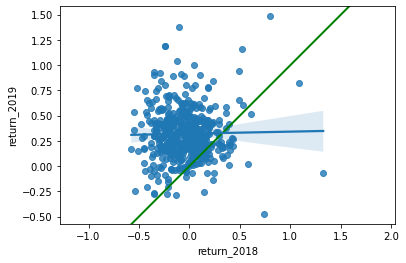

In [19]:
sp500_yearly_returns = pd.read_csv("dataset/sp500_yearly_returns.csv")

# Create a new figure, fig
fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x = "return_2018", y = "return_2019", data = sp500_yearly_returns)

# Set the axes so that the distances along the x and y axes look the same
plt.axis("equal")

# Show the plot
plt.show()

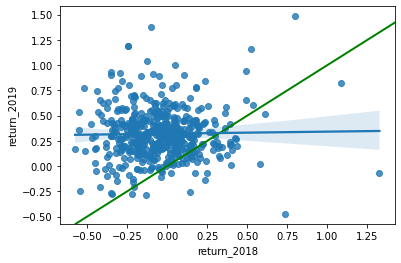

In [21]:
sp500_yearly_returns = pd.read_csv("dataset/sp500_yearly_returns.csv")

# Create a new figure, fig
fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x = "return_2018", y = "return_2019", data = sp500_yearly_returns)

# Set the axes so that the distances along the x and y axes look the same

# Show the plot
plt.show()

# Modeling consecutive returns

Let's quantify the relationship between returns in 2019 and 2018 by running a linear regression and making predictions. By looking at companies with extremely high or extremely low returns in 2018, we can see if their performance was similar in 2019.

In [22]:
# Run a linear regression on return_2019 vs. return_2018 using sp500_yearly_returns
mdl_returns = ols( 'return_2019 ~ return_2018', data = sp500_yearly_returns).fit()

# Print the parameters
print(mdl_returns.params)

Intercept      0.321321
return_2018    0.020069
dtype: float64


In [23]:

# Create a DataFrame with return_2018 at -1, 0, and 1 
explanatory_data = pd.DataFrame({"return_2018": [-1,0,1]})

# Use mdl_returns to predict with explanatory_data
print(mdl_returns.predict(explanatory_data))

0    0.301251
1    0.321321
2    0.341390
dtype: float64


# Transforming the explanatory variable

If there is no straight-line relationship between the response variable and the explanatory variable, it is sometimes possible to create one by transforming one or both of the variables. Here, you'll look at transforming the explanatory variable.

You'll take another look at the Taiwan real estate dataset, this time using the distance to the nearest MRT (metro) station as the explanatory variable. You'll use code to make every commuter's dream come true: shortening the distance to the metro station by taking the square root. Take that, geography!

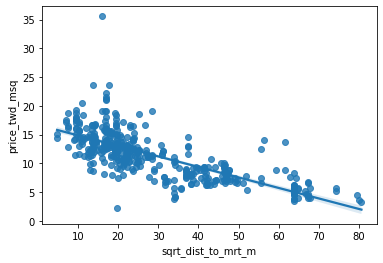

In [24]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

plt.figure()

# Plot using the transformed variable
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data = taiwan_real_estate )
plt.show()

In [25]:

# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data = taiwan_real_estate).fit()

# Print the parameters
print(mdl_price_vs_dist.params)

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64


In [26]:

explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data["sqrt_dist_to_mrt_m"])
)

# Print the result
print(prediction_data)

   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


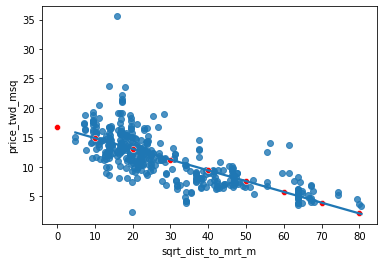

In [27]:

fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq",data=prediction_data, color="red")
plt.show()

# Transforming the response variable too

The response variable can be transformed too, but this means you need an extra step at the end to undo that transformation. That is, you "back transform" the predictions.

In the video, you saw the first step of the digital advertising workflow: spending money to buy ads, and counting how many people see them (the "impressions"). The next step is determining how many people click on the advert after seeing it.

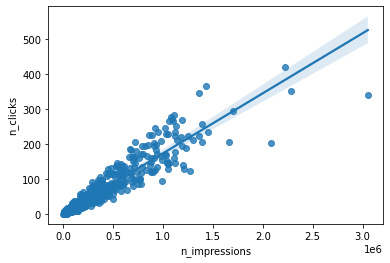

In [30]:
ad_conversion = pd.read_csv("dataset/ad_conversion.csv")

plt.figure()

# Plot using the transformed variables
sns.regplot(x = "n_impressions", y = "n_clicks", data = ad_conversion)
plt.show()

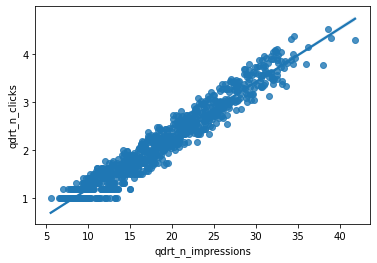

In [31]:

# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = np.power(ad_conversion["n_impressions"] , 0.25)
ad_conversion["qdrt_n_clicks"] = np.power(ad_conversion["n_clicks"] , 0.25)

plt.figure()

# Plot using the transformed variables
sns.regplot(x = "qdrt_n_impressions", y = "qdrt_n_clicks", data = ad_conversion)
plt.show()

In [32]:

# Run a linear regression of your transformed variables
mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data["qdrt_n_impressions"])
)

# Print the result
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


# Back transformation

In the previous exercise, you transformed the response variable, ran a regression, and made predictions. But you're not done yet! In order to correctly interpret and visualize your predictions, you'll need to do a back-transformation.

In [33]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks    n_clicks
0            0.000000            0.0       0.071748    0.000026
1           26.591479       500000.0       3.037576   85.135121
2           31.622777      1000000.0       3.598732  167.725102
3           34.996355      1500000.0       3.974998  249.659131
4           37.606031      2000000.0       4.266063  331.214159
5           39.763536      2500000.0       4.506696  412.508546
6           41.617915      3000000.0       4.713520  493.607180


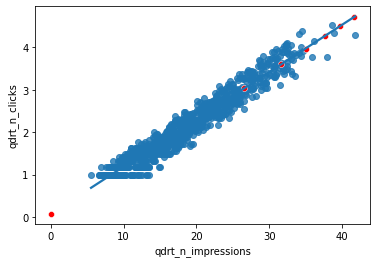

In [34]:
# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data = prediction_data, color="red")
plt.show()